# Выбор локации для скважины

Исследование для добывающей компании. Нужно решить, где бурить новую скважину. Предоставлены пробы нефти в трёх регионах, характеристики для каждой скважины в регионе тоже уже известны. Нужно построить модель для определения региона, где добыча принесёт наибольшую прибыль, проанализировать возможную прибыль и риски техникой Bootstrap.

In [1]:
# загружаю все нужные для проекта библиотеки
!pip install --upgrade scikit-learn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import phik

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/18/ff/919087b9aa5318c3992def31b74e019eee39c57ff6bf140289041df3db86/scikit_learn-1.4.1.post1-cp311-cp311-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 1.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.0
    Uninstalling scikit-learn-1.4.0:
      Successfully uninstalled scikit-learn-1.4.0


In [2]:
def load_data(file_name):
    data = pd.read_csv(file_name)  # разделила данные в датасете по столбцам и поправила разделитель в дробях
    print(data.head())
    data.info()
    return data

def plot_num_data(data, title, ax):
    sns.boxplot(data=data, ax=ax) # ящик с усами
    ax.set_title(title)

def hist_num_data(data, title, ax):
    sns.histplot(data=data, ax=ax) # гистограмма
    ax.set_title(title)

def data_for_model(data, drop_col, num_col, random_state=42):
    X = data.drop(drop_col, axis=1)
    y = data[drop_col[0]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

    minmax = MinMaxScaler()
    X_train_scaled = minmax.fit_transform(X_train[num_col])
    X_test_scaled = minmax.transform(X_test[num_col])
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col)

    return X_train_scaled, X_test_scaled, y_train, y_test

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def model(X_train, X_test,y_train, y_test):
    model_lr.fit(X_train, y_train)
    # сохраняю результат в переменную predictions
    predictions = model_lr.predict(X_test)
    # рассчитаю значения rmse для линейной регрессии
    rmse = mean_squared_error(y_test, predictions, squared=False)
    # вывожу полученное значение rmse и средний запас сырья
    return f'RMSE модели = {rmse}', f'Средний запас предсказанного сырья = {predictions.mean()}', predictions

# объединю целевой признак с предсказаниями
def target_plus_predictions(y_test, predictions):
    data_predictions = y_test.copy()
    data_predictions = pd.DataFrame(data_predictions)
    data_predictions['predictions_product'] = predictions
    data_predictions.reset_index(inplace=True)
    return data_predictions


## Загрузка и изучение данных

In [3]:
try:
    geo_data_0 = load_data('/Users/ira-bobrineva/Downloads/geo_data_0.csv')
except:
    geo_data_0 = load_data('/datasets/geo_data_0.csv')

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
try:
    geo_data_1 = load_data('/Users/ira-bobrineva/Downloads/geo_data_1.csv')
except:
    geo_data_1 = load_data('/datasets/geo_data_1.csv')

      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
try:
    geo_data_2 = load_data('/Users/ira-bobrineva/Downloads/geo_data_2.csv')
except:
    geo_data_2 = load_data('/datasets/geo_data_2.csv')

      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
geo_data_0.duplicated().sum()

0

In [7]:
geo_data_1.duplicated().sum()

0

In [8]:
geo_data_2.duplicated().sum()

0

В таблицах нет проблем: типы данных соответствуют, пропусков и дубликатов в значениях нет.

## Исследовательский анализ

Посмотрю на распределение количественных значений по регионам.

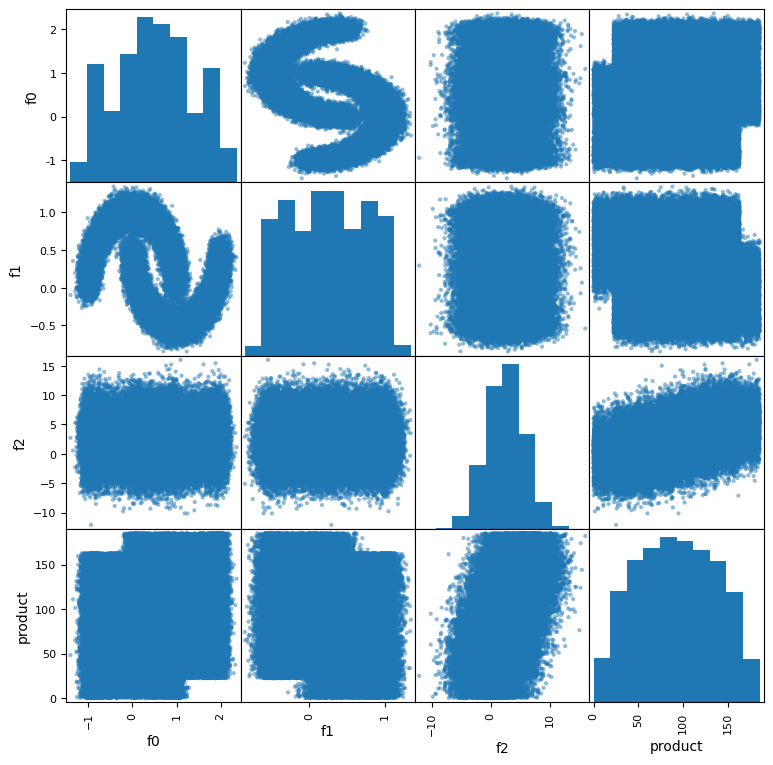

In [9]:
pd.plotting.scatter_matrix(geo_data_0, figsize=(9, 9)) 
plt.show()

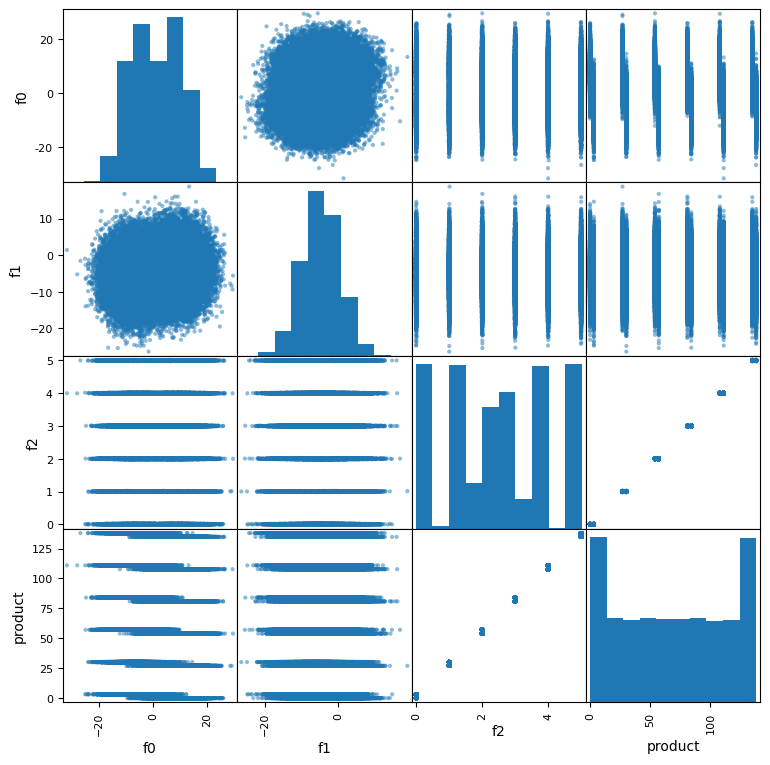

In [10]:
pd.plotting.scatter_matrix(geo_data_1, figsize=(9, 9))
plt.show()

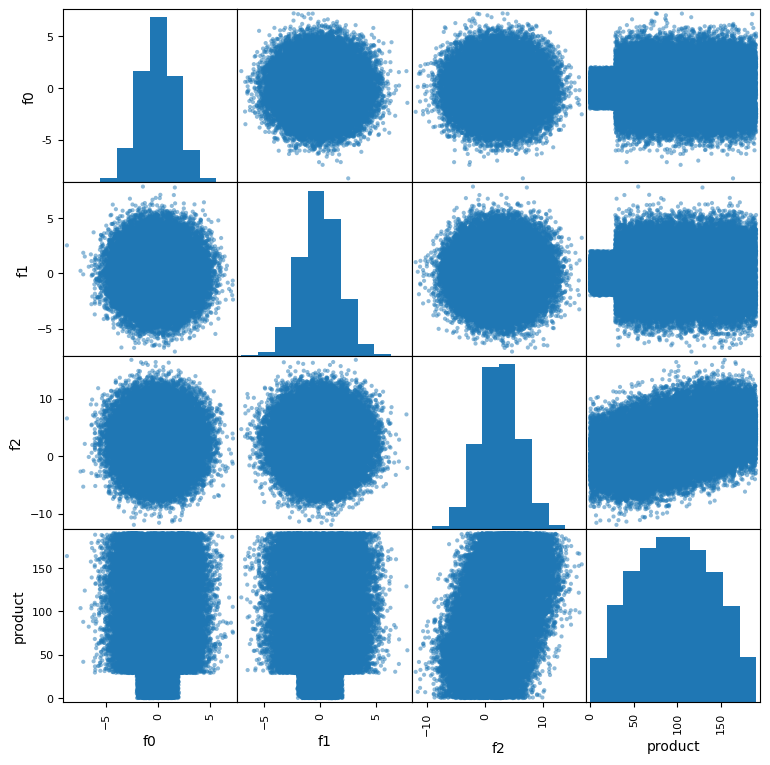

In [11]:
pd.plotting.scatter_matrix(geo_data_2, figsize=(9, 9))
plt.show()

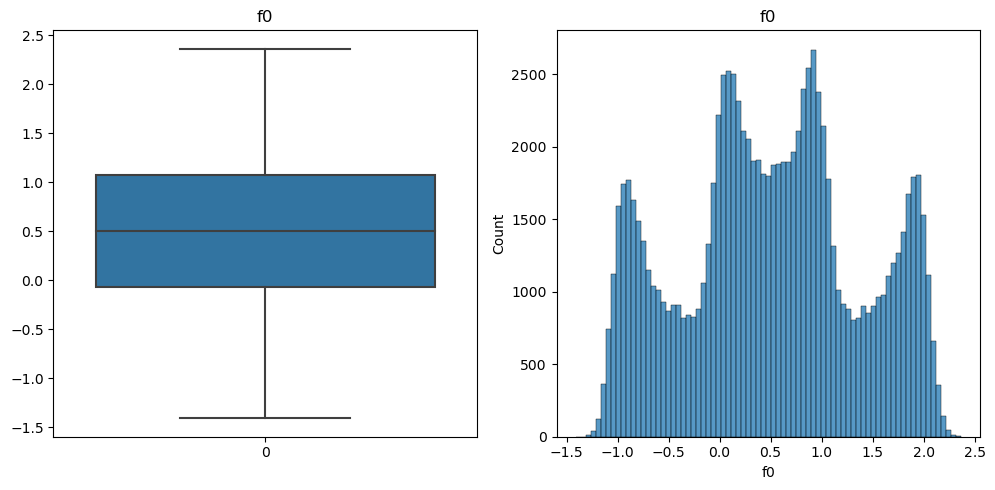

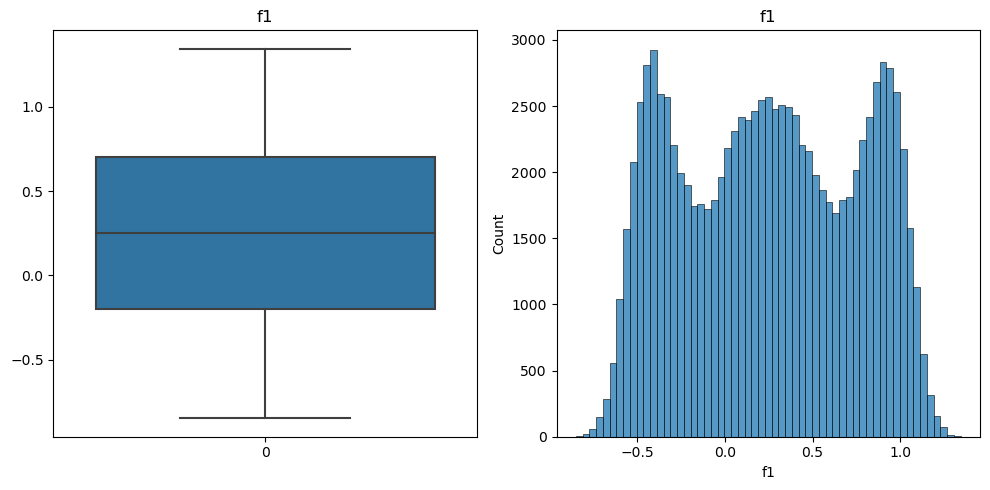

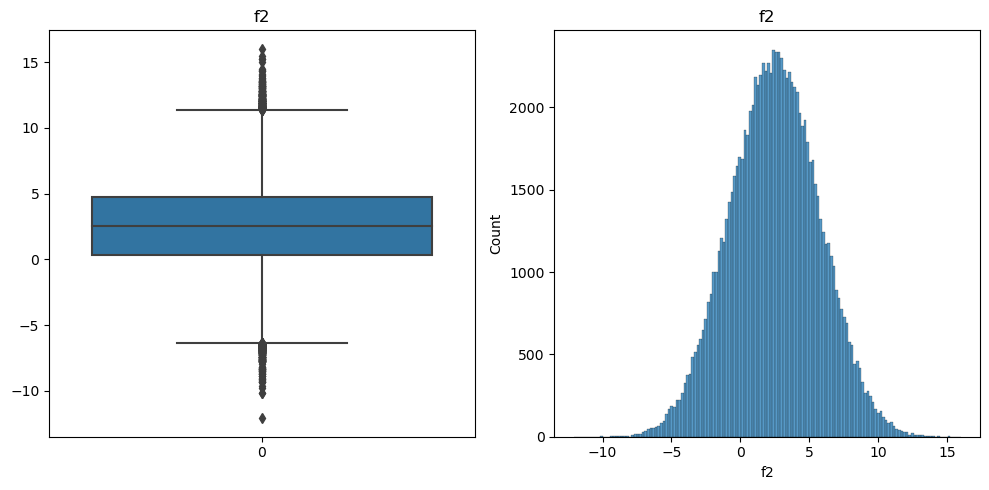

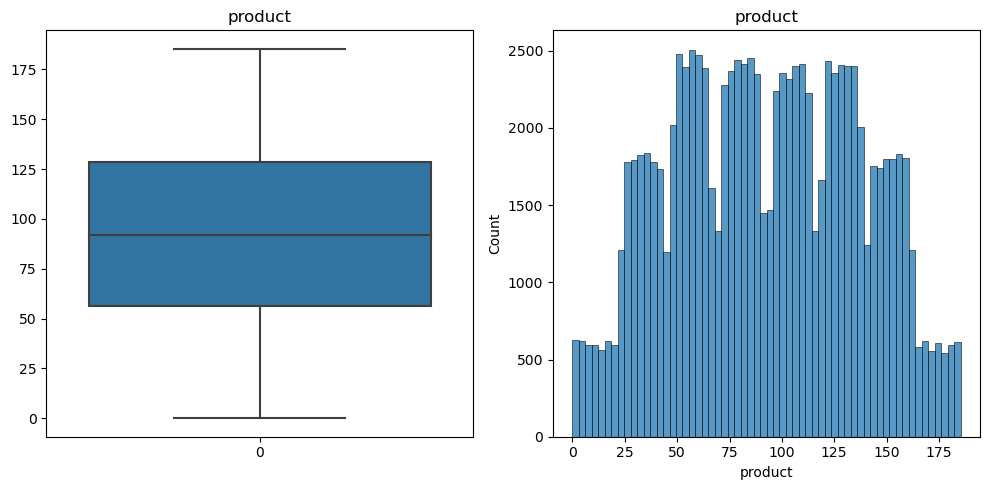

In [12]:
geo_data_0_num = geo_data_0.drop(['id'], axis=1)

for i, num in enumerate(geo_data_0_num):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    plot_num_data(geo_data_0_num[num], num, axs[0])
    hist_num_data(geo_data_0_num[num], num, axs[1])
    fig.tight_layout()
    plt.show()



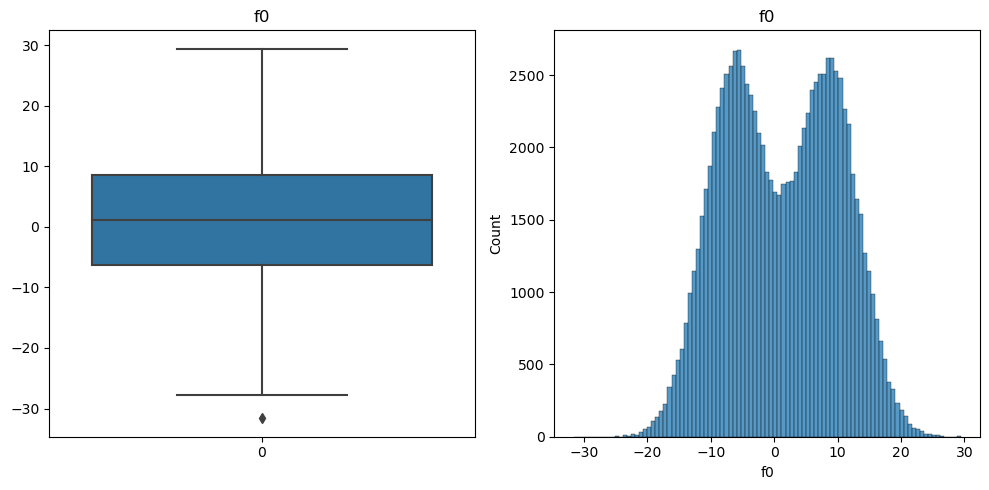

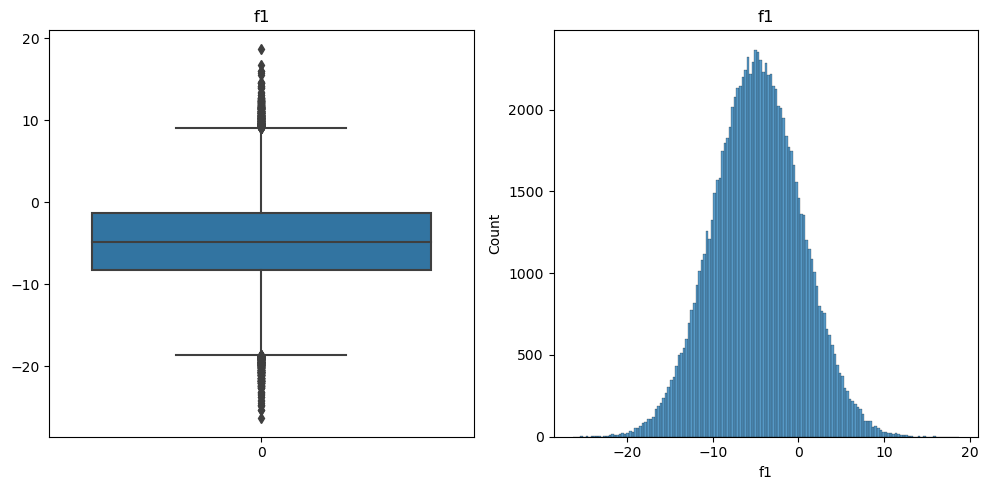

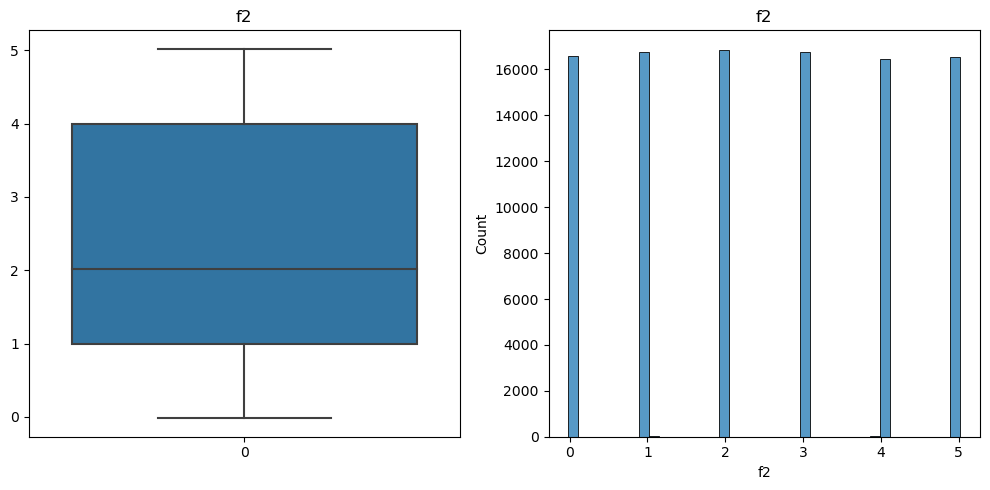

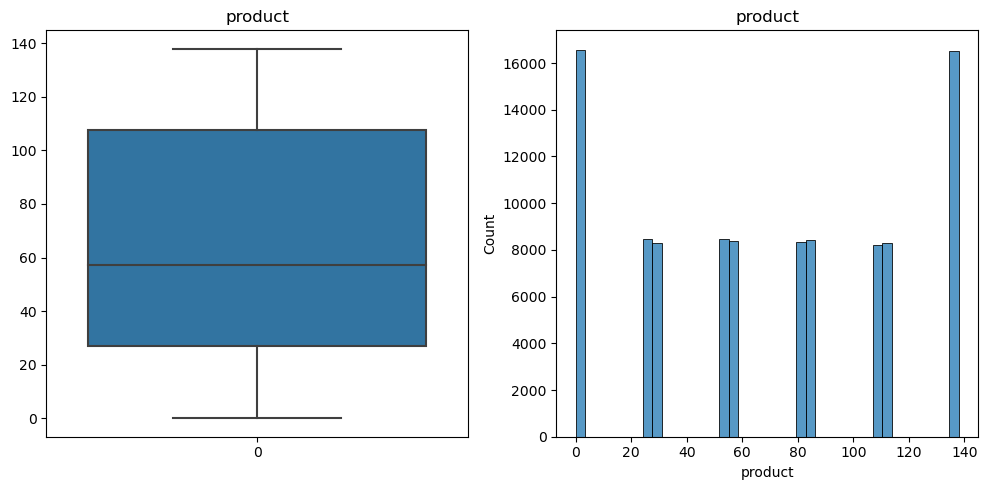

In [13]:
geo_data_1_num = geo_data_1.drop(['id'], axis=1)

for i, num in enumerate(geo_data_1_num):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    plot_num_data(geo_data_1_num[num], num, axs[0])
    hist_num_data(geo_data_1_num[num], num, axs[1])
    fig.tight_layout()
    plt.show()

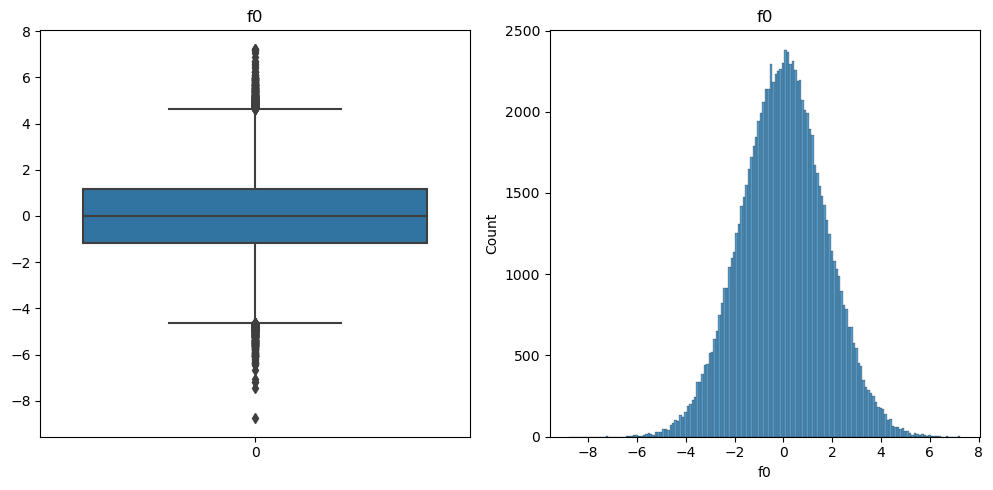

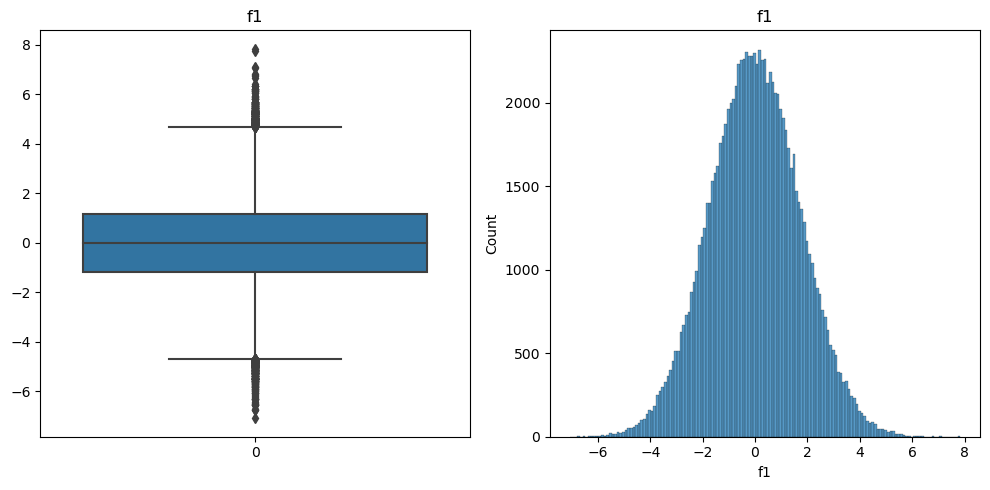

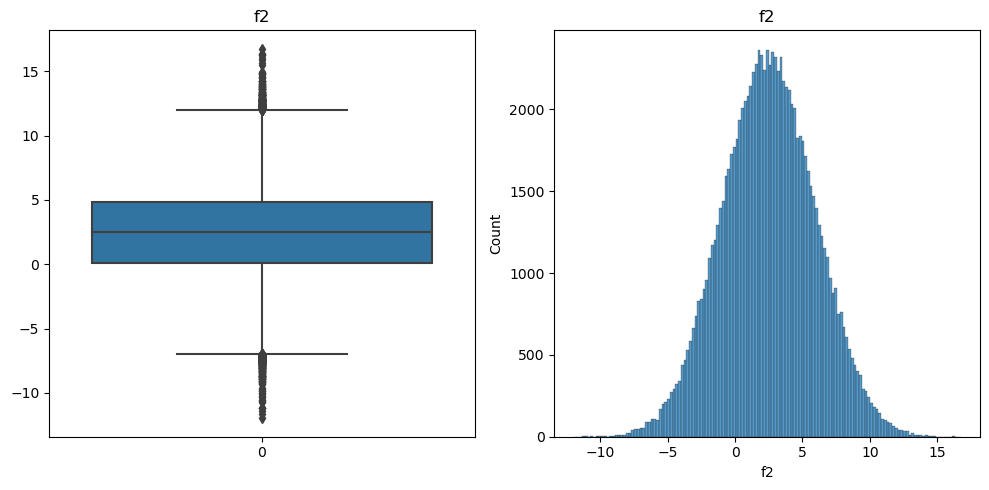

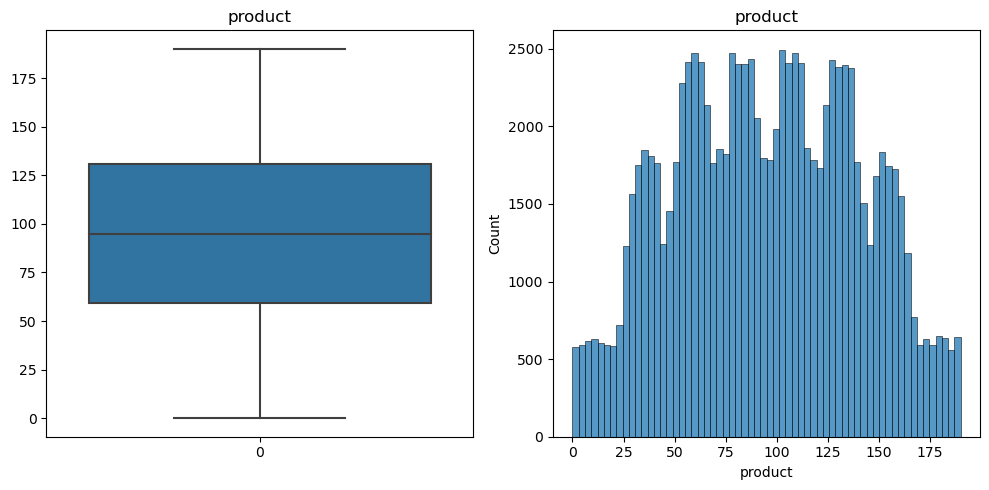

In [14]:
geo_data_2_num = geo_data_2.drop(['id'], axis=1)

for i, num in enumerate(geo_data_2_num):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    plot_num_data(geo_data_2_num[num], num, axs[0])
    hist_num_data(geo_data_2_num[num], num, axs[1])
    fig.tight_layout()
    plt.show()

Наблюдения по распределениям количественных признаков, которые могут потом пригодится:

|         | geo_data_0                                                            | geo_data_1                                                                           | geo_data_2                                                            |
|---------|-----------------------------------------------------------------------|--------------------------------------------------------------------------------------|-----------------------------------------------------------------------|
| f0      | от -1.5 до 2.5 <br/> осн. знач. от 0 до 1<br/> 4 модальн.             | от -28 до 30 <br/> осн. знач. от -8 до 10<br/> 2 модальн.                            | от -4 до 4 <br/> осн. знач. от -1 до 1<br/> выбросы<br/> норм. распр. |
| f1      | от -1 до 1.5 <br/> осн. знач. от -0.25 до 0.75<br/> 3 модальн.        | от -20 до 10 <br/> осн. знач. от -10 до 0<br/> выбросы<br/> норм. распр.             | от -4 до 4 <br/> осн. знач. от -1 до 1<br/> выбросы<br/> норм. распр. |
| f2      | от -5 до 10 <br/> осн. знач. от 0 до 5<br/> выбросы<br/> норм. распр. | от 0 до 5 <br/> осн. знач. от 1 до 4<br/> кат. знач.                                 | от -6 до 11 <br/> осн. знач. от 0 до 5<br/> выбросы<br/> норм. распр. |
| product | от 0 до 179 <br/> осн. знач. от 50 до 125<br/> мультмодальн.          | от 0 до 140 <br/> осн. знач. от 25 до 110<br/> кол-во 0 = кол-во 140<br/> кат. знач. | от 0 до 180 <br/> осн. знач. от 55 до 130<br/> мультмодальн.          |

Пока кажется, что самый выгодный регион - третий. Он близок по значениям к первому, но всё же чуть лучше: немного больше запасов, все значимые признаки имеют нормальное распределение. Правда, много выбросов не только выше 75-го квартиля, но и ниже 25-го. Но, возможно, в этом нет ничего страшного для бизнеса.  По матрице рассеяния у первого и третьего регионов зависимости между значениями более-менее близки к линейным. Второй очень сильно отличается по всем показателям, и объём запасов достаточно скудный: мест с нулевыми значениями запасов столько же, сколько и мест с самыми большими значениями. В других же регионах значения запасов в целом больше. 

## Корреляционный анализ

In [15]:
geo_data_0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [16]:
geo_data_0['id'].duplicated().sum()

10

/Users/ira-bobrineva/anaconda3/lib/python3.11/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable id is large: 99990. Are you sure this is not an interval variable? Analysis for pairs of variables including id can be slow.
  warnings.warn(


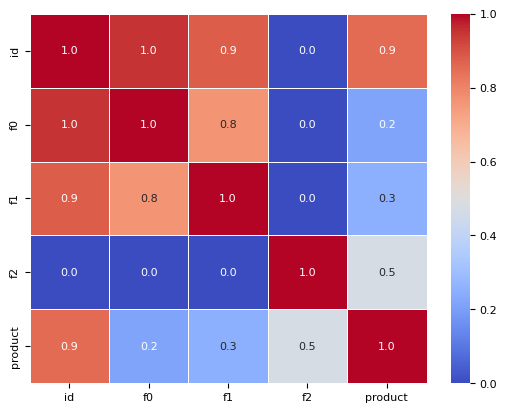

In [17]:
phik_matrix_0 = geo_data_0.phik_matrix(interval_cols = ['f0', 'f1', 'f2', 'product'])
plt.rcParams['font.size'] = '8'
sns.heatmap(phik_matrix_0, annot=True, linewidth=.5, fmt=".1f", cmap='coolwarm')
plt.show()

In [18]:
geo_data_1

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [19]:
geo_data_1['id'].duplicated().sum()

4

/Users/ira-bobrineva/anaconda3/lib/python3.11/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable id is large: 99996. Are you sure this is not an interval variable? Analysis for pairs of variables including id can be slow.
  warnings.warn(


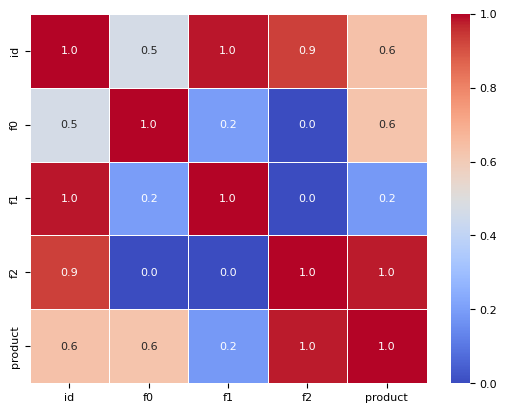

In [20]:
phik_matrix_1 = geo_data_1.phik_matrix(interval_cols = ['f0', 'f1', 'f2', 'product'])
plt.rcParams['font.size'] = '8'
sns.heatmap(phik_matrix_1, annot=True, linewidth=.5, fmt=".1f", cmap='coolwarm')
plt.show()

In [21]:
geo_data_2

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [22]:
geo_data_2['id'].duplicated().sum()

4

/Users/ira-bobrineva/anaconda3/lib/python3.11/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable id is large: 99996. Are you sure this is not an interval variable? Analysis for pairs of variables including id can be slow.
  warnings.warn(


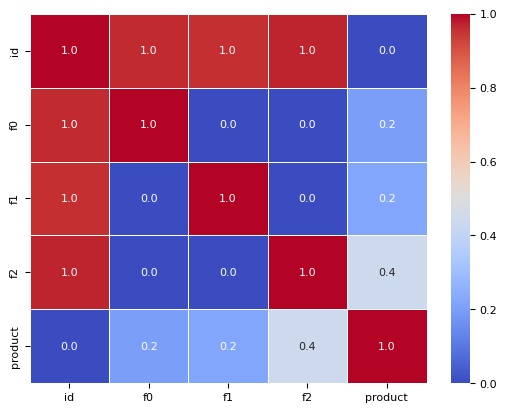

In [23]:
phik_matrix_2 = geo_data_2.phik_matrix(interval_cols = ['f0', 'f1', 'f2', 'product'])
plt.rcParams['font.size'] = '8'
sns.heatmap(phik_matrix_2, annot=True, linewidth=.5, fmt=".1f", cmap='coolwarm')
plt.show()

В некоторых датасетах есть мультиколлинеарность между признаками, например, между f2 и целевым признаком во втором даатсете, но придётся её пока оставить, потому что все признаки значимы. Но перед обучением можно по крайней мере убрать индексы из датасетов, поскольку они тоже состоят в сильной связи с другими признаками и при этом не важны для предсказаний.

## Модель для первого региона

In [24]:
geo_data_0.set_index('id', inplace=True)
geo_data_0.head()

,f0,f1,f2,product
id,,,,
txEyH,0.705745,-0.497823,1.221170,105.280062
2acmU,1.334711,-0.340164,4.365080,73.037750
409Wp,1.022732,0.151990,1.419926,85.265647
iJLyR,-0.032172,0.139033,2.978566,168.620776
Xdl7t,1.988431,0.155413,4.751769,154.036647


In [25]:
drop_col = ['product']
num_col = ['f0','f1', 'f2']

X_train_0, X_test_0, y_train_0, y_test_0 = data_for_model(geo_data_0, drop_col, num_col)

In [26]:
model_lr = LinearRegression()
model_lr = LinearRegression()
rmse, amount, predictions = model(X_train_0, X_test_0, y_train_0, y_test_0)
rmse, amount


/Users/ira-bobrineva/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


('RMSE модели = 37.75660035026169',
 'Средний запас предсказанного сырья = 92.39879990657768')

In [27]:
# объединю целевой признак с предсказаниями
data_predictions = target_plus_predictions(y_test_0, predictions)
data_predictions

,id,product,predictions_product
0,7C6bA,122.073350,101.901017
1,dVxsn,48.738540,78.217774
2,1Gm3l,131.338088,115.266901
3,Nzg1t,88.327757,105.618618
4,Z7b4F,36.959266,97.980185
...,...,...,...
24995,pXFCs,148.821520,105.076959
24996,tf6nq,123.454003,74.768176
24997,pv8T0,91.945213,82.544397
24998,nol4A,149.295563,81.826689


## Модель для второго региона

In [28]:
geo_data_1.set_index('id', inplace=True)

drop_col_1 = ['product']
num_col_1 = ['f0','f1', 'f2']

X_train_1, X_test_1, y_train_1, y_test_1 = data_for_model(geo_data_1, drop_col_1, num_col_1)

In [29]:
rmse_1, amount_1, predictions_1 = model(X_train_1, X_test_1, y_train_1, y_test_1)
rmse_1, amount_1


/Users/ira-bobrineva/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


('RMSE модели = 0.8902801001028815',
 'Средний запас предсказанного сырья = 68.71287803913762')

In [30]:
data_predictions_1 = target_plus_predictions(y_test_1, predictions_1)
data_predictions_1

,id,product,predictions_product
0,fYVDK,0.000000,0.844738
1,3SQcq,53.906522,52.921612
2,hQ1gJ,134.766305,135.110385
3,Y4vux,107.813044,109.494863
4,H1NUw,0.000000,-0.047292
...,...,...,...
24995,Vn3pL,107.813044,108.351600
24996,zZe7H,53.906522,53.604049
24997,iefIy,26.953261,26.708734
24998,CFT5B,110.992147,109.823087


## Модель для третьего региона

In [31]:
geo_data_2.set_index('id', inplace=True)

drop_col_2 = ['product']
num_col_2 = ['f0','f1', 'f2']

X_train_2, X_test_2, y_train_2, y_test_2 = data_for_model(geo_data_2, drop_col_2, num_col_2)


In [32]:
rmse_2, amount_2, predictions_2 = model(X_train_2, X_test_2, y_train_2, y_test_2)
rmse_2, amount_2

/Users/ira-bobrineva/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


('RMSE модели = 40.145872311342174',
 'Средний запас предсказанного сырья = 94.77102387765939')

In [33]:
data_predictions_2 = target_plus_predictions(y_test_2, predictions_2)
data_predictions_2

,id,product,predictions_product
0,sPjbT,117.441301,98.301916
1,1u4uo,47.841249,101.592461
2,kZ6HO,45.883483,52.449099
3,gCZGK,139.014608,109.922127
4,rqJHx,84.004276,72.411847
...,...,...,...
24995,hMnQH,40.797226,102.764169
24996,KGq37,87.144239,93.431823
24997,CKCjb,52.039812,64.098390
24998,ANcQx,136.961454,83.764135


Первая и третья модели дают сильные погрешности, иногда их предсказания больше или меньше истинных в два раза, но в целом примерно попадают в значения. Чтобы улучшить значения метрик, нужно, думаю, поработать с выбросами во входных признаках. Но поскольку неизвестен смысл входных признаков, то пока и непонятно, как эти выбросы обрабатывать. Возможно, для бизнеса будет достаточно предсказаний и с такой погрешностью. Лучше всего предсказывает вторая модель, но и среднее значение запасов самое маленькое среди регионов. У третьего региона самое большое среднее значение.

## Расчёт прибыли

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью. Убыток — это отрицательная прибыль.

In [34]:
# рассчитаю достаточный объём сырья для безубыточной разработки новой скважины
# 90 млн я получила следующим образом: 200 (количество скважин для разработки) * 450 000 (доход с каждой единицы продукта)
budget_per_region = 10000000000
best_oil_well_amount = 200
price_per_thousand_barrels = 450000

baseline_turnover_per_oil_well = budget_per_region / (best_oil_well_amount * price_per_thousand_barrels)
baseline_turnover_per_oil_well

111.11111111111111

Достаточный объём сырья для безубыточной разработки новой скважины - 111 тыс. баррелей. Первые и третьи регионы близки по среднему к достаточному объёму, но не второй.

In [35]:
# функция для расчёта прибыли по регионам
def profit(data):
    # отсортирую значения по предсказаниям
    sorted_predictions = data.sort_values(by='predictions_product', ascending=False)
    # просуммирую первые 200 реальных значений
    real_oil_amount = sorted_predictions['product'].head(200).sum()
    # умножу сумму реальных значений на цену за 1000 баррелей
    profit = (real_oil_amount * price_per_thousand_barrels) - budget_per_region
    # выведу значения в миллиардах
    return round(profit / 10**9, 2)


In [36]:
print('Прибыль первого региона = ', profit(data_predictions))
print('Прибыль второго региона = ', profit(data_predictions_1))
print('Прибыль третьего региона = ', profit(data_predictions_2))

Прибыль первого региона =  3.36
Прибыль второго региона =  2.42
Прибыль третьего региона =  2.6


In [38]:
# тут с помощью бутстрепа изучаю распределение прибыли первого региона
profits = []
state = np.random.RandomState(12345)
# бутстреп будет рассчитываться для 1000 выборок
for i in range(1000):
    # размер выборок - 500 скважин, затем из этих 500 выберу 200 лучших и рассчитаю прибыль с помощью функции profit
    subsample = data_predictions.sample(n=500, replace=True, random_state=state)
    # собираю значения прибыли по каждой выборке
    profits.append(profit(subsample))

profits = pd.Series(profits)
profits

0      0.27
1      0.57
2      0.57
3      0.39
4      0.25
       ... 
995    0.98
996    0.45
997    0.42
998   -0.36
999   -0.05
Length: 1000, dtype: float64

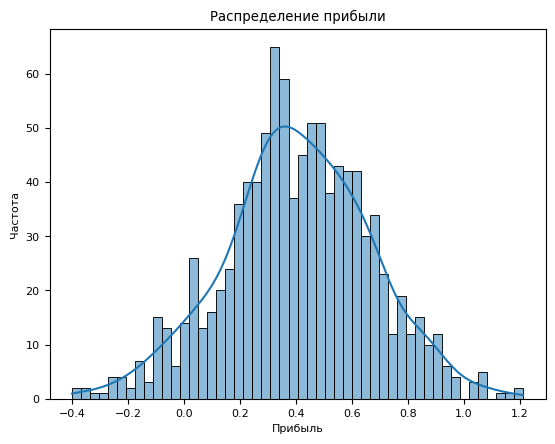

In [39]:
# вывела график распределения прибыли
sns.histplot(profits, kde=True, bins=50)
plt.title('Распределение прибыли')
plt.xlabel('Прибыль')
plt.ylabel('Частота')
plt.show()

In [40]:
confidence_interval = profits.quantile([0.025, 0.975])
mean = profits.mean()
probability_negative_profit = (profits < 0).mean()
print('Средняя прибыль = ', mean)
print('95% доверительный интервал = ', confidence_interval)
print('Вероятность убытков = ', probability_negative_profit * 100)

Средняя прибыль =  0.40628000000000003
95% доверительный интервал =  0.025   -0.12025
0.975    0.91025
dtype: float64
Вероятность убытков =  6.5


Вероятность убытков больше 2,5%.

In [41]:
profits_1 = []
for i in range(1000):
    subsample_1 = data_predictions_1.sample(n=500, replace=True, random_state=state)
    profits_1.append(profit(subsample_1))

profits_1 = pd.Series(profits_1)
profits_1

0      0.36
1      0.52
2      0.82
3      0.86
4      0.26
       ... 
995    0.46
996    0.46
997    0.69
998    0.63
999    0.58
Length: 1000, dtype: float64

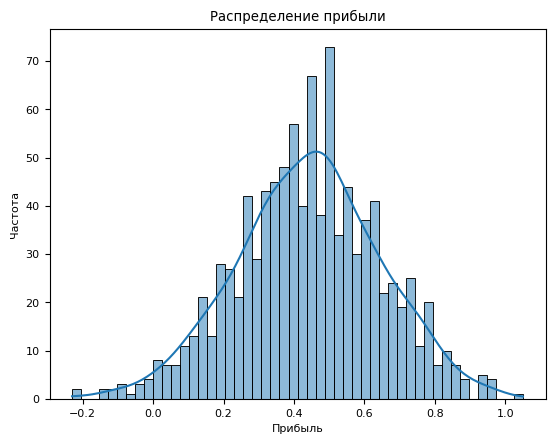

In [42]:
sns.histplot(profits_1, kde=True, bins=50)
plt.title('Распределение прибыли')
plt.xlabel('Прибыль')
plt.ylabel('Частота')
plt.show()

In [43]:
confidence_interval_1 = profits_1.quantile([0.025, 0.975])
mean_1 = profits_1.mean()
probability_negative_profit_1 = (profits_1 < 0).mean()
print('Средняя прибыль = ', mean_1)
print('95% доверительный интервал = ', confidence_interval_1)
print('Вероятность убытков = ', probability_negative_profit_1 * 100)

Средняя прибыль =  0.44148000000000004
95% доверительный интервал =  0.025    0.0395
0.975    0.8300
dtype: float64
Вероятность убытков =  1.6


Вероятность убытков меньше 2,5%.

In [44]:
profits_2 = []
for i in range(1000):
    subsample_2 = data_predictions_2.sample(n=500, replace=True, random_state=state)
    profits_2.append(profit(subsample_2))

profits_2 = pd.Series(profits_2)
profits_2

0      0.30
1      0.58
2      0.55
3      0.99
4      0.88
       ... 
995    0.41
996    0.18
997    0.29
998    0.55
999    0.37
Length: 1000, dtype: float64

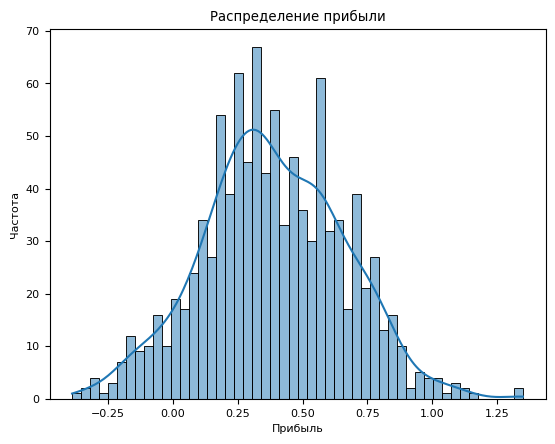

In [45]:
sns.histplot(profits_2, kde=True, bins=50)
plt.title('Распределение прибыли')
plt.xlabel('Прибыль')
plt.ylabel('Частота')
plt.show()

In [46]:
confidence_interval_2 = profits_2.quantile([0.025, 0.975])
mean_2 = profits_2.mean()
probability_negative_profit_2 = (profits_2 < 0).mean()
print('Средняя прибыль = ', mean_2)
print('95% доверительный интервал = ', confidence_interval_2)
print('Вероятность убытков = ', probability_negative_profit_2 * 100)

Средняя прибыль =  0.38523
95% доверительный интервал =  0.025   -0.16025
0.975    0.89000
dtype: float64
Вероятность убытков =  7.5


Вероятность убытков больше 2,5%.

## Выводы

В таблицах по регионам не было проблем: типы данных соответствуют, пропусков и дубликатов в значениях нет.

Исследовательский анализ показал, что третий регион близок по значениям к первому, но всё же чуть лучше: немного больше запасов, все значимые признаки имеют нормальное распределение.  По матрице рассеяния у первого и третьего регионов зависимости между значениями более-менее близки к линейным. Второй очень сильно отличался по всем показателям, и объём запасов достаточно скудный: мест с нулевыми значениями запасов столько же, сколько и мест с самыми большими значениями. В других же регионах значения запасов в целом больше. 

Применила линейную регрессию, чтобы предсказать значения запасов скважин в валидационной выборке. Первая и третья модели по регионам дали сильные погрешности, иногда их предсказания были больше или меньше истинных в два раза. Чтобы улучшить значения метрик, нужно, думаю, поработать с выбросами во входных признаках. Но поскольку неизвестен смысл входных признаков, то пока и непонятно, как эти выбросы обрабатывать. Возможно, для бизнеса будет достаточно предсказаний и с такой погрешностью. Лучше всего предсказывает вторая модель, но и среднее значение запасов самое маленькое среди регионов. У третьего региона самое большое среднее значение.

Достаточный объём сырья для безубыточной разработки новой скважины — 111 тыс. баррелей. Первые и третьи регионы близки по среднему к достаточному объёму, но не второй. Второй регион также приносит самую низкую выручку тоже самым плохим — 2.42 млрд., тогда как первый и третий принесут 3.36 и 2.6 соответственно. Однако вероятность убытков у второго региона самая маленькая - 1.6, а у первого и третьего - 6.5 и 7.5.

**Совет**: рекомендую начать разрабатывать второй регион. Несмотря на низкое значение запасов, регион самый стабильный по прибыли. Вероятность убытков всего лишь 1.6, тогда как в других регионах больше 2.5.